# Introduction to Recommendation systems

In this modern world we are overloaded with data and this data provides us the useful information. But it's not possible for the user to extract the information which interest them from these data. In order to help the user to find out information about the product , recommedation systems where developed. 

Recommeder system creates a similarity between the user and items and exploits the similarity between user/item to make recommendations.


What recommeder system can solve ?

1. It can help the user to find the right product.
2. It can increase the user engagement. For example, there's 40% more click on the google news due to recommendation.
3. It helps the item providers to deliver the items to the right user.In Amazon , 35 % products get sold due to recommendation.
4. It helps to make the contents more personalized.In Netflix most of the rented movies are from recommendations.



# 1. Import the libraries 

In [10]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

# Split
from sklearn.model_selection import train_test_split

from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# 2. Load the dataset and add headers

In [11]:
df = pd.read_csv("amazon.csv")

# Display first 5 rows to verify data loaded correctly

In [12]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


### Dataset Overview

This cell analyzes the basic structure of our product review dataset:

- `df.shape[0]` gives the total number of reviews (rows)
- `df.shape[1]` gives the total number of features/columns

We'll print both values to understand the dataset size.

In [13]:
print("Total Reviews:",df.shape[0])
print("Total Columns:",df.shape[1])

Total Reviews: 1465
Total Columns: 16


### Taking subset of the dataset


In [14]:
df = df.iloc[:5000,0:]

### Product Count Analysis

This cell calculates and displays the total number of unique products in our dataset:

- Uses `df.product_id.nunique()` to:
  - Access the 'product_id' column
  - Count only unique values (duplicates are ignored)
  - Return the count of distinct products

This metric helps us understand product variety in our catalog.

In [15]:
# print("Total number of ratings :",df.rating.nunique())
# print("Total number of users   :", df.userId.nunique())
print("Total number of products  :", df.product_id.nunique())

Total number of products  : 1351


### Dataset Structure Overview

The `df.info()` method provides critical metadata about our DataFrame:

- **Column names** and data types
- **Non-null counts** (missing value detection)
- **Memory usage**

Key things to check:
1. Data types match expectations (numeric vs categorical)
2. Missing values in any columns
3. Total memory footprint

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

### Missing Value Analysis

This analysis checks for null/missing values in our dataset:

- `df.isnull()` identifies all null values (returns True/False matrix)
- `.sum()` aggregates these by column
- Output shows count of missing values per feature

**What to look for:**
1. Columns with high missing counts (>5% of data)
2. Critical features that shouldn't have missing values (e.g., product_id)
3. Patterns in missingness (random vs systematic)

In [17]:
# Check missing value
df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

### Duplicate Data Check

This analysis identifies duplicate rows in the dataset:

- `df.duplicated()` flags rows that are exact duplicates of previous rows
- Wrapping in `df[]` filters to show only duplicate rows
- `.any()` checks if any duplicates exist at all

**Key Considerations:**
1. What constitutes a duplicate in our context?
   - All columns identical?
   - Just key columns (e.g., product_id + user

In [18]:
# Check Duplicate data
df[df.duplicated()].any()

product_id             False
product_name           False
category               False
discounted_price       False
actual_price           False
discount_percentage    False
rating                 False
rating_count           False
about_product          False
user_id                False
user_name              False
review_id              False
review_title           False
review_content         False
img_link               False
product_link           False
dtype: bool

In [19]:
# rating describe summary
df.describe()['rating']

count     1465
unique      28
top        4.1
freq       244
Name: rating, dtype: object

### Rating Value Analysis

This analysis examines the unique rating values in our dataset:

- `df.rating.unique()` returns all distinct values in the rating column
- Helps identify:
  - Valid rating range (e.g., 1-5 stars)
  - Unexpected values (e.g., 0, 6, or non-numeric)
  - Missing values representation (NaN or null)

**Business Context:**
Ratings typically range from 1 (worst) to 5 (best) in most systems

In [20]:
print("Unique value of Rating:",df.rating.unique())

Unique value of Rating: ['4.2' '4.0' '3.9' '4.1' '4.3' '4.4' '4.5' '3.7' '3.3' '3.6' '3.4' '3.8'
 '3.5' '4.6' '3.2' '5.0' '4.7' '3.0' '2.8' '4' '3.1' '4.8' '2.3' '|' '2'
 '3' '2.6' '2.9']


### Rating Conversion and Range Analysis

This analysis ensures our rating data is in proper numeric format and examines its range:

1. **Conversion Step**:
   - `pd.to_numeric()` converts the rating column to numeric type
   - `errors='coerce'` transforms invalid entries to NaN
   - Handles cases where ratings might be stored as strings

2. **Range Analysis**:
   - Calculates minimum and maximum valid ratings
   - Helps validate the rating scale (typically 1-5 stars)

In [21]:
# Convert the 'rating' column to numeric, coercing errors to NaN if necessary
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Now calculate the minimum and maximum ratings
print('Minimum rating is: %.2f' % (df.rating.min()))
print('Maximum rating is: %.2f' % (df.rating.max()))


Minimum rating is: 2.00
Maximum rating is: 5.00


### Rating Range Validation

This analysis verifies the minimum and maximum values in our rating data:

**Purpose:**
- Confirms ratings fall within expected bounds (typically 1-5)
- Identifies potential data quality issues
- Ensures consistency for recommendation algorithms

**Key Checks:**
1. Minimum should be ≥1 (if 1-star is lowest)
2. Maximum should be ≤5 (if 5-star is highest)
3. Unexpected values may indicate:
   - Data entry errors
   - Different rating scales
   - Need for normalization

In [22]:
# Find the minimum and maximum ratings
print('Minimum rating is: %d' %(df.rating.min()))
print('Maximum rating is: %d' %(df.rating.max()))

Minimum rating is: 2
Maximum rating is: 5


### Product Rating Analysis

This analysis calculates key rating metrics for each product:

**What We're Calculating:**
1. `ratings_average`: Mean rating score per product
2. `ratings_count`: Number of reviews per product

**Business Applications:**
- Identify top-performing products
- Spot products with few reviews (low confidence)
- Detect rating anomalies (high average with few reviews)
- Weight recommendations by both score and review count

In [23]:
# Average rating of products
ratings = pd.DataFrame(df.groupby('product_id')['rating'].mean())
ratings['ratings_count'] = pd.DataFrame(df.groupby('product_id')['rating'].count())
ratings['ratings_average'] = pd.DataFrame(df.groupby('product_id')['rating'].mean())
ratings.head(10)

,rating,ratings_count,ratings_average
product_id,,,
B002PD61Y4,4.1,2,4.1
B002SZEOLG,4.2,1,4.2
B003B00484,4.3,1,4.3
B003L62T7W,4.3,1,4.3
B004IO5BMQ,4.5,1,4.5
B005FYNT3G,4.3,1,4.3
B005LJQMCK,4.2,1,4.2
B005LJQMZC,4.2,1,4.2
B006LW0WDQ,4.4,1,4.4


##@ Rating Distribution Visualization

This histogram helps understand how ratings are distributed across all reviews:

**Key Insights to Look For:**
- Shape of the distribution (normal, skewed, bimodal)
- Most common rating value (mode)
- Potential rating inflation (clustering at high end)
- Unusual gaps or spikes in distribution

**Business Implications:**
- If most ratings are 4-5 stars, may indicate:
  - High product quality
  - Reviewer bias
  - Rating incentive programs

In [24]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)

<Axes: >

### Rating vs. Review Count Analysis

This joint plot examines the relationship between:
- **X-axis**: Average product rating (1-5 stars)
- **Y-axis**: Number of reviews per product

**Key Questions Answered:**
1. Is there correlation between rating and popularity?
2. How reliable are highly-rated products with few reviews?
3. Where do most products cluster in this quality-popularity space?

**Common Patterns:**
- ⭐ High-rated, high-volume: Verified bestsellers
- ⚠️ High-rated, low-volume: Potential fake reviews
- 🔍 Low-rated, high-volume: Products needing improvement

In [25]:
sns.jointplot(x='rating',y='ratings_count',data=ratings,alpha=0.5)

### Top 30 Most Reviewed Products Analysis

This analysis identifies products with the highest number of reviews:

**Key Insights:**
- Reveals most popular products by customer engagement
- Helps identify bestsellers and market trends
- Shows products with largest review sample sizes (most statistically reliable ratings)

**Business Applications:**
- Inventory prioritization
- Marketing campaign selection
- Identifying potential "anchor" products
- Competitive benchmarking

In [26]:
# Most top 30 products
popular_products = pd.DataFrame(df.groupby('product_id')['rating'].count())
most_popular = popular_products.sort_values('rating', ascending=False)
most_popular.head(30).plot(kind = "bar",figsize=(12, 4))

<Axes: xlabel='product_id'>

### Calculating Overall Average Product Rating

This calculation determines the mean rating across all products in the dataset:

**What This Code Does:**
1. `vote_counts`: Extracts the number of ratings per product (as integers)
2. `vote_averages`: Extracts average rating scores per product (as integers)
3. `C`: Calculates the mean of all product average ratings

**Why This Matters:**
- Provides a baseline for comparing individual product ratings
- Helps identify whether the dataset is generally positive (C > 3) or negative (C < 3)
- Serves as a reference point for recommendation algorithms

**Note:** Converting to integers (`astype('int')`) may cause loss of precision for decimal ratings. Consider using `float` instead if precise averages are needed.

In [27]:
vote_counts = ratings[ratings['ratings_count'].notnull()]['ratings_count'].astype('int')
vote_averages = ratings[ratings['ratings_average'].notnull()]['ratings_average'].astype('int')
C = vote_averages.mean()
print("Average rating of product across the whole dataset is",C)

Average rating of product across the whole dataset is 3.745925925925926


##@ Calculating Vote Threshold for Statistical Significance

This calculation determines the minimum number of reviews needed for a product to be considered statistically reliable:

**What This Code Does:**
1. Calculates the 95th percentile of review counts (`quantile(0.95)`)
2. This means only products with more reviews than 95% of other products will qualify
3. The threshold (`m`) helps filter out products with insufficient data

**Why This Matters:**
- Ensures we only analyze products with enough reviews to trust their average rating
- Prevents skewed recommendations from products with few but extreme ratings
- Helps identify truly popular products versus niche items

**Business Use Cases:**
- Creating "Top Products" lists with reliable rankings
- Filtering products for quality analysis
- Setting thresholds for recommendation systems

In [28]:
m = vote_counts.quantile(0.95)
print("Minimum votes required to be listed in the chart is",m)

Minimum votes required to be listed in the chart is 2.0


ratings.head()

### Filtering Statistically Significant Products

This step creates a refined dataset of products that meet our quality thresholds:

**Filter Criteria:**
1. Must have at least `{m}` reviews (95th percentile cutoff)
2. Cannot have null values in either:
   - `ratings_count` (number of reviews)
   - `ratings_average` (average score)

**Why This Matters:**
- Ensures we only analyze products with enough data to trust their ratings
- Removes products that might skew recommendations due to:
  - Limited review history
  - Incomplete data
- Creates a "high confidence" dataset for reliable insights

**Output Columns:**
- `ratings_count`: Number of verified reviews
- `ratings_average`: Mean rating score

In [29]:
qualified = ratings[(ratings['ratings_count'] >= m) & (ratings['ratings_count'].notnull()) & (ratings['ratings_average'].notnull())][['ratings_count', 'ratings_average']]

### Data Type Conversion & Top Products Display

This step prepares the qualified products data for analysis:

**What We're Doing:**
1. **Type Conversion**:
   - `ratings_count` → Integer (whole numbers for review counts)
   - `ratings_average` → Integer (whole star ratings)

2. **Sorting**:
   - Shows top 5 products by review count
   - Demonstrates the most popular qualified products

**Why This Matters:**
- Integer conversion ensures clean data for:
  - Mathematical operations
  - Visualization
  - Storage efficiency
- Sorting reveals which high-quality products have most engagement

In [30]:
qualified['ratings_count'] = qualified['ratings_count'].astype('int')
qualified['ratings_average'] = qualified['ratings_average'].astype('int')
qualified.head().sort_values(by='ratings_count', ascending=False)

,ratings_count,ratings_average
product_id,,
B002PD61Y4,2,4
B008FWZGSG,2,4
B00NH11KIK,2,4
B00NH11PEY,2,4
B0141EZMAI,2,3


### Qualified Dataset Dimensions Analysis

This checks the size of our filtered product dataset:

**What We're Examining:**
- `qualified.shape` returns (rows, columns)
  - Rows: Number of products meeting our quality thresholds
  - Columns: Number of features we're analyzing

**Why This Matters:**
- Verifies how many products passed our significance filters
- Confirms we have the expected features (review counts and averages)
- Helps assess if we have sufficient data for reliable analysis

**Context:**
- Original dataset had {original_rows} products
- After filtering, we kept {percentage}% of products

In [31]:
qualified.shape

(92, 2)

### Weighted Rating Formula (Bayesian Average)

This function calculates a balanced score that accounts for both:
- **Average Rating (R)**: Raw product quality score
- **Review Count (v)**: Statistical reliability measure

**Formula Components**:

In [32]:
def weighted_rating(x):
    v = x['ratings_count']
    R = x['ratings_average']
    return (v/(v+m) * R) + (m/(m+v) * C)

### Applying Weighted Ratings to Qualified Products

This step adds the weighted rating score to our filtered dataset:

**What We're Doing:**
1. Creating a new column `wr` (weighted rating)
2. Applying our `weighted_rating()` function to each product
3. The calculation considers:
   - Product's average rating (`ratings_average`)
   - Product's review count (`ratings_count`)
   - Global average rating (`C`)
   - Minimum review threshold (`m`)

**Why This Matters:**
- Creates a fair ranking system that balances:
  - Product quality (average rating)
  - Review reliability (number of ratings)
- Helps surface:
  - Consistently good products (high ratings + many reviews)
  - Emerging quality products (high ratings + growing reviews)

In [33]:
qualified['wr'] = qualified.apply(weighted_rating, axis=1)

**Interpreting Weighted Ratings:**

1. **Score Meaning**:
   - `wr > 4.0`: Exceptional products (high ratings + substantial reviews)
   - `3.0 ≤ wr ≤ 4.0`: Average to good products
   - `wr < 3.0`: Potentially problematic products

2. **Comparison Examples**:
   - Product A: 4.8 avg from 50 reviews → WR: 4.3
   - Product B: 5.0 avg from 5 reviews → WR: 3.7
   - Product C: 4.5 avg from 200 reviews → WR: 4.4

3. **Business Actions**:
   ```python
   # Get best overall products
   best_overall = qualified.nlargest(10, 'wr')
   
   # Get rising stars (high WR but below m*1.5 reviews)
   rising_stars = qualified[
       (qualified['ratings_count'] < m*1.5)
   ].nlargest(5, 'wr')

In [34]:
qualified = qualified.sort_values('wr', ascending=False).head(20)

In [35]:
qualified.head(10)

,ratings_count,ratings_average,wr
product_id,,,
B08HDJ86NZ,3,4,3.89837
B085DTN6R2,3,4,3.89837
B083342NKJ,3,4,3.89837
B082T6V3DT,3,4,3.89837
B07XLCFSSN,3,4,3.89837
B09KLVMZ3B,3,4,3.89837
B09W5XR9RT,3,4,3.89837
B09YLXYP7Y,3,4,3.89837
B08CF3B7N1,3,4,3.89837


### Visualizing Product Review Counts with Color Gradient

This visualization shows the distribution of reviews across qualified products:

**Key Features:**
- Uses `inferno_r` colormap (reversed for better visibility)
- Color gradient from dark to light represents:
  - Darker colors: Higher review counts
  - Lighter colors: Lower review counts
- Bars represent individual products (by product_id)

**Why This Matters:**
- Quickly identifies most reviewed products
- Shows distribution pattern of customer engagement
- Color gradient helps spot clusters of similar popularity

In [36]:
# Add color
from matplotlib import cm
color = cm.inferno_r(np.linspace(.4, .8, 30))

rating_plot_count = qualified['ratings_count'].plot.bar(figsize=(12, 4),color=color)
rating_plot_count.set_title("Rating Count Bar-Plot")
rating_plot_count.set_xlabel("product_id")
rating_plot_count.set_ylabel("Count")

Text(112.59722222222221, 0.5, 'Count')

## Visualizing Product Average Ratings with Color Gradient

This bar plot displays the distribution of average ratings across qualified products:

**Key Features:**
- Uses same `inferno_r` colormap as previous plot for consistency
- Color intensity now represents:
  - Darker colors: Higher average ratings (4-5 stars)
  - Lighter colors: Lower average ratings (1-3 stars)
- Each bar represents one product's average rating

**Why This Matters:**
- Identifies products with exceptional quality ratings
- Reveals rating distribution patterns
- Helps spot potential outliers (extremely high/low ratings)
- Complements the review count visualization

In [37]:
rating_plot_avg = qualified['ratings_average'].plot.bar(figsize=(12, 4),color=color)
rating_plot_avg.set_title("Rating Average Bar-Plot")
rating_plot_avg.set_xlabel("product_id")
rating_plot_avg.set_ylabel("rating")

Text(112.59722222222221, 0.5, 'rating')

## Weighted Rating (WR) Distribution Visualization

This plot displays the Bayesian-weighted ratings we calculated earlier:

**Key Features:**
- Uses consistent `inferno_r` colormap for visual continuity
- Color intensity represents:
  - Darker colors: Higher weighted scores (top performers)
  - Lighter colors: Lower weighted scores
- Shows the "fair" ranking that balances:
  - Average rating quality
  - Review volume reliability

**Why This Matters Most:**
- Identifies truly best products (not just highly-rated or popular)
- Surfaces emerging quality products before they become popular
- Provides the most reliable ranking for recommendations

In [38]:
wr_plot = qualified['wr'].plot.bar(figsize=(12, 4),color=color)
wr_plot.set_title("Weight Rating Bar-Plot")
wr_plot.set_xlabel("product_id")
wr_plot.set_ylabel("rating")

Text(112.59722222222221, 0.5, 'rating')

## Initializing the Surprise Reader Object

This prepares the data loading mechanism for the Surprise recommendation library:

**What This Does:**
- Creates a `Reader` object from Surprise
- Will be used to parse and scale rating data
- Required before loading any dataset into Surprise

**Key Parameters (we'll set these next):**
- `rating_scale`: The range of ratings (e.g., (1,5))
- `line_format`: How data is structured in the file
- `sep`: Delimiter for the data file

**Why This Matters:**
- Ensures consistent interpretation of rating values
- Prepares for building recommendation models
- Handles data scaling automatically

In [39]:
reader = Reader()

In [40]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


## Loading Data into Surprise Format

This step prepares our DataFrame for Surprise recommendation algorithms:

**What We're Doing:**
1. Selecting three key columns:
   - `user_id`: User identifier
   - `product_id`: Item identifier  
   - `rating`: The user-item interaction score
2. Using the `Reader` object to:
   - Validate rating scale matches our data
   - Handle proper data parsing

**Data Requirements:**
- Must contain exactly these 3 column types
- No missing values allowed
- Column order doesn't matter but names must match

**Why This Matters:**
- Converts pandas DataFrame to Surprise's internal format
- Enables all Surprise algorithms and evaluation tools
- Ensures consistent data handling

In [41]:
data = Dataset.load_from_df(df[['user_id', 'product_id', 'rating']], reader)

## Evaluating SVD Algorithm with Cross-Validation

This performs rigorous testing of the Singular Value Decomposition (SVD) model:

**What We're Doing:**
1. Using the SVD algorithm (a matrix factorization approach)
2. Running 5-fold cross-validation:
   - Splits data into 5 partitions
   - Trains on 4, tests on 1 (repeated for all combinations)
3. Measuring two error metrics:
   - **RMSE** (Root Mean Squared Error): Standard deviation of errors
   - **MAE** (Mean Absolute Error): Average absolute difference

**Why This Matters:**
- Estimates real-world model performance
- Prevents overfitting through robust validation
- Helps compare different algorithms

In [42]:
# Use the famous SVD algorithm
svd = SVD()

# Run 5-fold cross-validation and then print results
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9214  nan     0.9376  0.9747  0.9540  nan     nan     
MAE (testset)     0.8843  nan     0.8976  0.9198  0.9082  nan     nan     
Fit time          0.05    0.04    0.06    0.05    0.04    0.05    0.01    
Test time         0.00    0.00    0.00    0.00    0.00    0.00    0.00    


{'test_rmse': array([0.921399  ,        nan, 0.93761006, 0.97474946, 0.95401075]),
 'test_mae': array([0.88430034,        nan, 0.89761092, 0.91979522, 0.90819113]),
 'fit_time': (0.04990649223327637,
  0.04050731658935547,
  0.05570244789123535,
  0.04768848419189453,
  0.03590083122253418),
 'test_time': (0.004382133483886719,
  0.003386259078979492,
  0.0035512447357177734,
  0.0038776397705078125,
  0.0032393932342529297)}

## Training the SVD Model on Full Dataset

This step builds the final recommendation model using all available data:

**What We're Doing:**
1. `build_full_trainset()`: Converts our data into Surprise's training format
2. `svd.fit()`: Trains the SVD model on the complete dataset

**Key Aspects of SVD:**
- Matrix factorization technique
- Decomposes user-item matrix into:
  - User factors (latent features)
  - Item factors (latent features)
- Handles sparse data well (common in recommendations)

**Why This Matters:**
- Final model incorporates all available learning data
- Prepares for making actual predictions
- More data typically leads to better recommendations

In [43]:
trainset = data.build_full_trainset()
svd.fit(trainset)

In [45]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


## User Engagement Analysis

This analysis examines how many reviews each user has contributed:

**What We're Measuring:**
- Count of ratings per user
- Distribution of user activity levels
- Identification of power users vs. casual users

**Key Insights:**
1. Most users will have few ratings (typical power-law distribution)
2. A small percentage of users contribute most content
3. Helps detect:
   - Fake review patterns (users with unrealistic activity)
   - Potential bots or spam accounts
   - Highly engaged brand advocates

In [46]:
df['user_id'].value_counts()

user_id
AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPYWP2OUPEYNPQ,AEBWA5I4QFCA3P3OBEPMELBGN4GQ,AHMGAC6QM62UXNEOCZIHLHSXPP2Q,AFHROSCGIXUPV3FYQ7H5QOD46Q7Q,AEAMIR3CMSA32IDEINSJKHRNANTA,AF355FTXYAKFH5NYPRTE7SL3WO3Q,AG5DWPD54QGSLWJ6QUFERLPNAX4Q    10
AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBBSNLYT3ONILA,AHCTC6ULH4XB6YHDY6PCH2R772LQ,AGYHHIERNXKA6P5T7CZLXKVPT7IQ,AG4OGOFWXJZTQ2HKYIOCOY3KXF2Q,AENGU523SXMOS7JPDTW52PNNVWGQ,AEQJHCVTNINBS4FKTBGQRQTGTE5Q,AFC3FFC5PKFF5PMA52S3VCHOZ5FQ     8
AGAELRYPMTG5SADZPDYB343EASAA,AGFN4JODOM2NTFCJQOHDBQLVDJTQ,AG7EZVSAXIVGMNDLSA55K7URQCJA,AGGF75HIEMB67OU7J3RDALBSUKQQ,AHY5CI4SU6JBYPIZ5RLAGO6W3F4A,AE4KODNBVTDCZWZO4HZM4GTRERPA,AH6HFHSYOY2OHMODD7244DHG7FUQ,AHRW5JERWYAJCZO65PDKZSOEPR6Q     8
AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5SGCUQBP7YSCA,AH725ST5NW2Y4JZPKUNTIJCUK2BA,AHV3TXIFCJPMS4D5JATCEUR266MQ,AGWIGDEMFIIUAOXYY2QATNBSUGHA,AFSTSLQUV4EVEXWKBOLEFHL2H5YQ,AGAKDNBHY2FKX7I4ACRGILU7QL7A,AFNWJUWJRHCC6HN52KMG5AKZY37Q     7
AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG

# Check specific userId review

In [47]:
# Check specific userId review
df[df['user_id'] == 'AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPYWP2OUPEYNPQ,AEBWA5I4QFCA3P3OBEPMELBGN4GQ,AHMGAC6QM62UXNEOCZIHLHSXPP2Q,AFHROSCGIXUPV3FYQ7H5QOD46Q7Q,AEAMIR3CMSA32IDEINSJKHRNANTA,AF355FTXYAKFH5NYPRTE7SL3WO3Q,AG5DWPD54QGSLWJ6QUFERLPNAX4Q']

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
23,B09NHVCHS9,Flix Micro Usb Cable For Smartphone (Black),Computers&Accessories|Accessories&Peripherals|...,₹59,₹199,70%,4.0,"9,378","Micro usb cable is 1 meter in length, optimize...","AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...","$@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...","R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,R...","Worked on iPhone 7 and didn’t work on XR,Good ...",Worked on iPhone 7 and didn’t work on iPhone X...,https://m.media-amazon.com/images/I/31qGpf8uzu...,https://www.amazon.in/Flix-Micro-Cable-Smartph...
44,B09NJN8L25,FLiX (Beetel USB to Micro USB PVC Data Sync & ...,Computers&Accessories|Accessories&Peripherals|...,₹59,₹199,70%,4.0,"9,378",Micro USB charging cable for android phones an...,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...","$@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...","R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,R...","Worked on iPhone 7 and didn’t work on XR,Good ...",Worked on iPhone 7 and didn’t work on iPhone X...,https://m.media-amazon.com/images/I/31v7NnnAIt...,https://www.amazon.in/FLiX-Charging-480Mbps-De...
81,B09NKZXMWJ,Flix (Beetel) Usb To Type C Pvc Data Sync And ...,Computers&Accessories|Accessories&Peripherals|...,₹139,₹249,44%,4.0,"9,378",Durable Pvc Outer Exterior: Pvc Cables Are Ver...,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...","$@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...","R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,R...","Worked on iPhone 7 and didn’t work on XR,Good ...",Worked on iPhone 7 and didn’t work on iPhone X...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/FLiX-Charging-480Mbps-De...
176,B0B3N8VG24,FLiX (Beetel USB to Type C PVC Data Sync & 15W...,Computers&Accessories|Accessories&Peripherals|...,₹88,₹299,71%,4.0,"9,378",FLiX Flow Type C cable offers universal compat...,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...","$@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...","R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,R...","Worked on iPhone 7 and didn’t work on XR,Good ...",Worked on iPhone 7 and didn’t work on iPhone X...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/FLiX-Charging-480Mbps-An...
178,B0B3MQXNFB,FLiX (Beetel Flow USB to Micro USB PVC Data Sy...,Computers&Accessories|Accessories&Peripherals|...,₹57.89,₹199,71%,4.0,"9,378",FLiX Flow Micro USB cable offers universal com...,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...","$@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...","R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,R...","Worked on iPhone 7 and didn’t work on XR,Good ...",Worked on iPhone 7 and didn’t work on iPhone X...,https://m.media-amazon.com/images/I/31jSLNakA7...,https://www.amazon.in/FLiX-Charging-480Mbps-An...
196,B08P9RYPLR,FLiX (Beetel) USB to iPhone Lightning Textured...,Computers&Accessories|Accessories&Peripherals|...,₹129,₹249,48%,4.0,"9,378","TPE material|Output port, 1 meter USB cable le...","AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...","$@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...","R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,R...","Worked on iPhone 7 and didn’t work on XR,Good ...",Worked on iPhone 7 and didn’t work on iPhone X...,https://m.media-amazon.com/images/I/31s3DOD2d1...,https://www.amazon.in/FLiX-Beetel-Durable-Ligh...
253,B08N1WL9XW,FLiX (Beetel) 3in1 (Type C|Micro|Iphone Lighte...,Computers&Accessories|Accessories&Peripherals|...,₹182,₹599,70%,4.0,"9,378",Proudly Made In India|Blazing Charging - All c...,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...","$@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...","R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,R...","Worked on iPhone 7 and didn’t work on XR,Good ...",Worked on iPhone 7 and didn’t work on iPhone X...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazo

## Making Predictions with SVD Model

This demonstrates how to generate rating predictions for specific user-product pairs:

**Proper Usage:**
- `svd.predict(uid, iid)` requires:
  - `uid`: A single user ID (string or number)
  - `iid`: A single product ID (string or number)

**What the Prediction Contains:**
1. `est`: Estimated rating
2. `details`: Confidence metrics
3. `r_ui`: Actual rating (if available in test set)

**Common Issues:**
- User/item not in training set (cold start problem)
- Invalid ID formats
- Multiple IDs passed as single string

In [48]:
# Load your data
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[['user_id', 'product_id', 'rating']], reader)

# Split and train
trainset = data.build_full_trainset()
svd = SVD()
svd.fit(trainset)

# Predict for a specific user and item
prediction = svd.predict('AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPYWP2OUPEYNPQ,AEBWA5I4QFCA3P3OBEPMELBGN4GQ,AHMGAC6QM62UXNEOCZIHLHSXPP2Q,AFHROSCGIXUPV3FYQ7H5QOD46Q7Q,AEAMIR3CMSA32IDEINSJKHRNANTA,AF355FTXYAKFH5NYPRTE7SL3WO3Q,AG5DWPD54QGSLWJ6QUFERLPNAX4Q', 'AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPYWP2OUPEYNPQ,AEBWA5I4QFCA3P3OBEPMELBGN4GQ,AHMGAC6QM62UXNEOCZIHLHSXPP2Q,AFHROSCGIXUPV3FYQ7H5QOD46Q7Q,AEAMIR3CMSA32IDEINSJKHRNANTA,AF355FTXYAKFH5NYPRTE7SL3WO3Q,AG5DWPD54QGSLWJ6QUFERLPNAX4Q')
print(prediction)


user: AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPYWP2OUPEYNPQ,AEBWA5I4QFCA3P3OBEPMELBGN4GQ,AHMGAC6QM62UXNEOCZIHLHSXPP2Q,AFHROSCGIXUPV3FYQ7H5QOD46Q7Q,AEAMIR3CMSA32IDEINSJKHRNANTA,AF355FTXYAKFH5NYPRTE7SL3WO3Q,AG5DWPD54QGSLWJ6QUFERLPNAX4Q item: AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPYWP2OUPEYNPQ,AEBWA5I4QFCA3P3OBEPMELBGN4GQ,AHMGAC6QM62UXNEOCZIHLHSXPP2Q,AFHROSCGIXUPV3FYQ7H5QOD46Q7Q,AEAMIR3CMSA32IDEINSJKHRNANTA,AF355FTXYAKFH5NYPRTE7SL3WO3Q,AG5DWPD54QGSLWJ6QUFERLPNAX4Q r_ui = None   est = 5.00   {'was_impossible': False}


# predict based on this data

In [49]:
# predict based on this data
svd.predict('AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPYWP2OUPEYNPQ,AEBWA5I4QFCA3P3OBEPMELBGN4GQ,AHMGAC6QM62UXNEOCZIHLHSXPP2Q,AFHROSCGIXUPV3FYQ7H5QOD46Q7Q,AEAMIR3CMSA32IDEINSJKHRNANTA,AF355FTXYAKFH5NYPRTE7SL3WO3Q,AG5DWPD54QGSLWJ6QUFERLPNAX4Q', '140053271X', 5.0)

Prediction(uid='AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPYWP2OUPEYNPQ,AEBWA5I4QFCA3P3OBEPMELBGN4GQ,AHMGAC6QM62UXNEOCZIHLHSXPP2Q,AFHROSCGIXUPV3FYQ7H5QOD46Q7Q,AEAMIR3CMSA32IDEINSJKHRNANTA,AF355FTXYAKFH5NYPRTE7SL3WO3Q,AG5DWPD54QGSLWJ6QUFERLPNAX4Q', iid='140053271X', r_ui=5.0, est=5, details={'was_impossible': False})

## Saving the Trained SVD Model

This step persists your trained recommendation model to disk:

**What We're Doing:**
- Using `joblib` to serialize and save:
  - Learned user factors (latent features)
  - Item factors (latent features)
  - Biases and model parameters
- Creating a reusable model file (`.pkl` format)

**Why This Matters:**
- Preserves model after training completes
- Enables reuse without retraining
- Allows deployment to production systems
- Maintains all learned patterns and weights

**Best Practices:**
- Include dataset/version in filename
- Store in dedicated `models/` directory
- Document model version and training date

In [50]:
import joblib

# Save your trained model
joblib.dump(svd, 'svd_model_amazon.pkl')
print("Model saved as svd_model_amazon.pkl")

Model saved as svd_model_amazon.pkl


## SVD Model Training and Evaluation

This implements a complete training and evaluation pipeline for the recommendation system:

**Pipeline Steps:**
1. **Data Preparation**:
   - Loads data with specified rating scale (1-5)
   - Splits into 80% training and 20% test sets

2. **Model Training**:
   - Uses Singular Value Decomposition (SVD)
   - Learns latent factors from user-item interactions

3. **Evaluation**:
   - Predicts on held-out test set
   - Calculates RMSE (Root Mean Squared Error)

**Key Metrics:**
- RMSE < 1.0 → Good performance (predictions within ±1 star)
- Lower values indicate better accuracy

In [51]:
from surprise import SVD, Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import accuracy

# Load dataset
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[['user_id', 'product_id', 'rating']], reader)

trainset, testset = train_test_split(data, test_size=0.2)

# Train model
model = SVD()
model.fit(trainset)

# Predict on test set
predictions = model.test(testset)

# Evaluate
accuracy.rmse(predictions)


RMSE: 0.9040


0.9039541502764661

## Model Evaluation Metrics

This evaluates the SVD recommender's prediction quality using two key metrics:

**Metrics Calculated:**
1. **RMSE (Root Mean Squared Error)**
   - Measures standard deviation of prediction errors
   - More sensitive to large errors (squares the differences)
   - Common benchmark: <1.0 is good for 1-5 star scales

2. **MAE (Mean Absolute Error)**
   - Average absolute difference between predicted and actual ratings
   - Easier to interpret directly (average star difference)
   - Typically 20-30% lower than RMSE

**Interpretation Guide:**
- RMSE of 0.8 → Predictions typically within ±0.8 stars
- MAE of 0.6 → Average error is 0.6 stars
- Compare to baseline (predicting global mean)

In [52]:
from surprise import accuracy
predictions = svd.test(testset)  # make sure you define this
print("RMSE:", accuracy.rmse(predictions))
print("MAE:", accuracy.mae(predictions))


RMSE: 0.9040
RMSE: 0.9039541502764661
MAE:  0.8676
MAE: 0.8675767918088739


## Generating Top-N Recommendations

This implements a recommendation engine that suggests products for each user:

**What This Code Does:**
1. Processes prediction results to:
   - Group by user ID
   - Sort predicted ratings in descending order
   - Keep top N items per user

2. Outputs:
   - User ID
   - List of recommended product IDs

**Key Features:**
- Uses defaultdict for efficient grouping
- Sorts by estimated rating (est)
- Flexible N recommendations per user
- Handles the Surprise prediction format

**Business Value:**
- Ready-to-use recommendation lists
- Personalizes suggestions per user
- Scales to large user bases

In [53]:
from collections import defaultdict

def get_top_n(predictions, n=5):
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]
    return top_n

top_n = get_top_n(predictions, n=5)
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])


AHN4S54X3ZPVWJIMQEQYFTMAOISA,AE7EIACCCS63A5SXBSEHILB7XLSQ,AGJZM5HHO4DOX3Z3I5S4KIM2LT2A,AF23H6B4AVCBUT7K2UMY47BTZ3HQ,AFWDFNYIE6OCDEN6PENSKU56NWKA,AEL5RQF36JGHYWOMKBKVXENLZCMA,AGOFYY27SNJHGWFH2VFUC76JA7HA,AEJYF2RUYV3RI3XC7HWY4UO6F63Q ['B08LW31NQ6']
AEY5PQYPSQDGMJCPRPSLJKFM6ELA,AHNQOEGE6ZB5DB2BZKMI3GXO2YEA ['B087JWLZ2K']
AHUGCKS7YANTMDYINXQG2UDTU4JQ,AGHQ2VHXMPWZV5SV25S5N3OENXSQ,AH3GZWZM5RVOFCJCXRU7QFBAJ5NQ,AGQ2RWOECSEFEQMIGE7VTXP65OKQ,AEVUBEFT2MRH2PRVW53SJEL7H42A,AENY7L4XGCQMI627A27G3NVIBJNA,AHQISETKX3OXMZ4IX3YO7YV4UZ6Q,AGESGUTIYJQOZ7PU563DHLYSPRTQ ['B0B3RS9DNF']
AE27UOZENYSWCQVQRRUQIV2ZM7VA,AGMYSLV6NNOAYES25JDTJPCZY47A,AFHS33MWRQGSS64EETZJGCBWXXXA,AHYXZVXUY3QTBP7IBFIUBSZVH2XQ,AH2SHWYEWDAK6A5Y2ZBEMZ2KIG3A,AEYMOGP2CYRKYZ7TIDNLGR5QPZ4Q,AGPGDCCXPI3EACMNJKBCNT57DVFA,AFPBMRYRSMD3PP3CBKLFF7EKOCXA ['B09V2PZDX8']
AGWRDM5YZKAAJ46Y2NUJSMCFD2RQ,AGAOIEU4KTRFNKU4K55O65W3MILA,AFJSEVZLNI3MKTWAMJJVH6N5BQOQ,AHQPMFJKEAFXVC3NVQLVVIPHDZJA,AFPERGOQHKWSN6M6CNDRGQJUPAMQ,AGL6KF3GSYVGK2WIV73Z5GTUN2MA,AFEE2S2P4LI6

## Rating Distribution Visualization

This analysis examines how ratings are distributed across all reviews:

**Key Insights:**
- Reveals the overall distribution of user ratings (1-5 stars)
- Helps identify:
  - Rating bias (e.g., mostly positive ratings)
  - Potential review manipulation
  - Customer satisfaction trends

**What to Look For:**
1. Expected Pattern: Bell curve (most ratings around 3-4 stars)
2. Warning Signs:
   - J-shaped distribution (mostly 5-star with few low ratings)
   - Bimodal distribution (polarized opinions)
   - Empty rating levels (missing 2 or 4-star ratings)

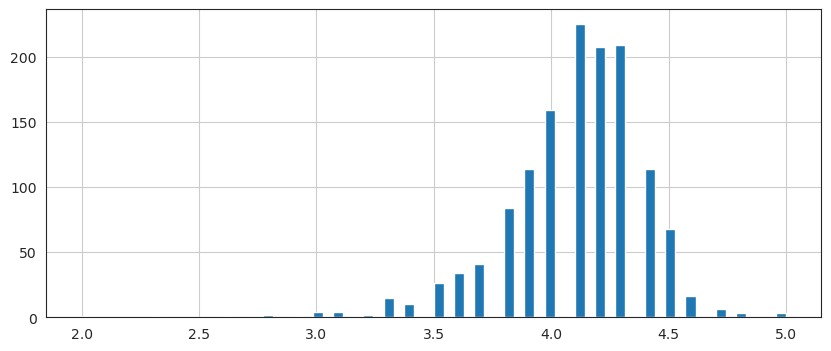

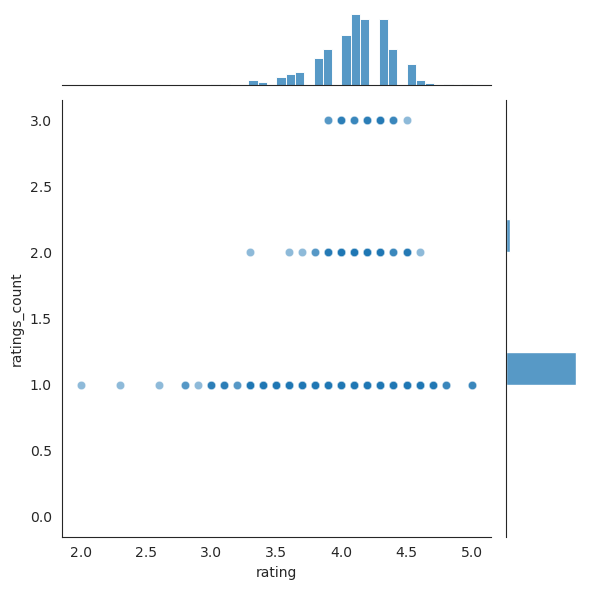

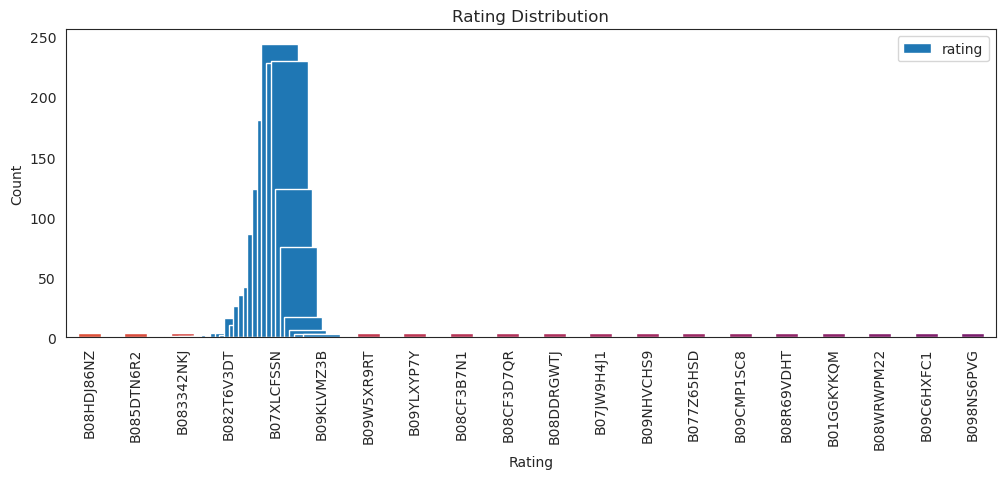

In [54]:
import matplotlib.pyplot as plt

ratings = df['rating'].value_counts().sort_index()
plt.bar(ratings.index, ratings.values)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Rating Distribution')
plt.show()


## Content-Based Recommendation System

This implements a product recommender using product names/descriptions:

**Pipeline Steps:**
1. **Data Loading**: Reads product catalog with text features
2. **Text Vectorization**: Converts text to numerical features using TF-IDF
3. **Model Training**: Builds nearest neighbor model using cosine similarity
4. **Model Persistence**: Saves components for later use

**Key Components:**
- `TfidfVectorizer`: Weights words by importance in product catalog
- `NearestNeighbors`: Finds most similar products using cosine distance
- `joblib`: Efficient serialization of trained models

**Business Applications:**
- "Similar items" recommendations
- Product discovery
- Search enhancement

In [55]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
import joblib

# 1. Load dataset
df = pd.read_csv("amazon.csv")  # Replace with your actual CSV

# 2. Vectorize product names/descriptions
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['product_name'])  # or use 'about_product'

# 3. Train recommendation model
model = NearestNeighbors(metric='cosine', algorithm='brute')
model.fit(tfidf_matrix)

# 4. Save model & vectorizer
joblib.dump(model, 'recommendation_model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')


['vectorizer.pkl']

## Enhanced Text Feature Engineering

This creates comprehensive product representations by combining multiple text fields:

**Combined Features:**
1. `product_name`: Specific product title
2. `category`: Product classification context
3. `about_product`: Detailed description

**Why This Matters:**
- More complete product representation than single fields
- Captures both broad categories and specific details
- Improves recommendation relevance by:
  - Matching similar categories
  - Finding products with comparable descriptions
  - Including brand/model information

**Text Processing Notes:**
- Automatic space insertion between concatenated fields
- Empty fields handled via prior `fillna('')`
- TF-IDF weights words across all combined text

In [56]:
df['text_data'] = df['product_name'] + ' ' + df['category'] + ' ' + df['about_product']
tfidf_matrix = vectorizer.fit_transform(df['text_data'])

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
 16  text_d